<a href="https://colab.research.google.com/github/FabriceBeaumont/4216_Biomedical_DS_and_AI/blob/main/Sheet10/Assignment_10_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biomedical Data Science & AI

## Assignment 10

#### Group members:  Fabrice Beaumont, Fatemeh Salehi, Genivika Mann, Helia Salimi, Jonah

**Exercise 1 - Variational Autoencoders (VAEs) (12 points)**


**1. Explain how far a VAE’s lower dimension representation differs from that learned
by a traditional autoencoder. How is that achieved? How far does the training
objective differ? (2 points)**

- Traditional autoencoders use the datapoints directly for encoding and minimising the reconstruction error without enforcing any organisation in the latent space(lower dimensional representation). VAE's on the other hand, assume that the input data belongs to a probability distribution over the latent space(lower dimensional representation) and attempts to find the parameters of that distribution. It maps each data point to a Gaussian distribution. This produces a smooth manifold embedding in latent space.


- Since traditional autoencoders do not learn a probability distribution hence the mapping generated by traditional autoencoders could be discontinuous (indicated by presence of gaps in the latent space). VAE's have smooth interpolation between different groups.


- Autoencoders cannot be used to generate new content. VAE's can be used as a generative system as they can produce new data which is related to original inputs. VAE's can be considered as autoencoders whose training process is regularised to avoid overfitting and latent space has the properties to enable generative process.


- In traditional autoencoders, each hidden layer represents a non-linear mapping of previous layer.
$$
z = s(Wx+b)
$$
The decoder is responsible for reconstructing the input using the output of the encoder.
$$
y = s(W'z+b')
$$
The objective is to minimise the reconstruction error which is done by gradient descent over the parameters of the encoder and decoder neural networks.

$$
\text{arg min}_{W, W', b, b'}\ l(x_i, y_i)
$$
Possible loss functions can be squared error or cross entropy for binary data.


- The training objective of VAE's consists of a reconstruction error term and regularisation term. It is given by:

$$
\tilde{L}(\theta, \phi, x^{(i)}) = \frac{1}{2} \sum_{j = 1}^{J}\left(1+log((\sigma_j^{(i)})^2))- (\mu_j^{(i)}))^2 - (\sigma_j^{(i)}))^2 \right) + \frac{1}{L} \sum_{l = 1}^{L}\left(log p_\theta(x^{(i)}|z^{(i,l)})\right)
$$

where J = mini-batch size and L = no. of samples

- Traditional autoencoders do not balance regularity (structures of latent space are intrepretable and exploitable) and reconstruction error(important information of the data must not be lost after dimensionality reduction). The VAE objective function is able to achieve this by balancing reconstruction accuracy and deviation from prior distribution.

**2. Inform yourself about the applications of autoencoders in the biomedical field.
Explore the literature, then mention one application and explain how it works. (2
points)**

- In the paper titled ***'Automatic Sleep Stage Scoring Using Time-Frequency Analysis and Stacked Sparse Autoencoders'*** by Tsinalis et al $^{[1]}$, a methodolgy has been developed for automatic sleep stage scoring. An openly available dataset containing EEG data of 20 healthy young adults was used in this literature. In order to ensure that the results of this study were suitable for longitudinal monitoring using wearable EEG in real world setting, only a single channel of EEG from the dataset was used for construction of the model. Sleep was classified into 5 stages namely - N1, N2, N3, R and W.


- Time frequency analysis based feature extraction is fine tuned to capture sleep stage specific signal features. Sleep stages are then classified using ensemble learning with an ensemble of stacked sparse autoencoders. For each model, class balanced random sampling across sleep stages was performed to deal with any class imbalance in the dataset.


- The hyperparameter values were fixed to $\lambda = 1 * 10^{-15}$, $\beta = 2.0$, $\rho=0.2$ and n = 20 (units of hidden layer), r = 60 (no. of optimisation iterations). The features were transformed so that distribution is approximately centered around mean hence sigmoid activation function was used for autoencoders. The final model consisted of an ensemble of 20 SSAEs(Stacked Sparse Autoencoders) having same hyperparameters. The results were evaluated using 20 fold cross validation.


- The method achieved an overall accuracy in range 75-80%, high mean F1-score in range 82-86% and mean accuracy across individual sleep stages in range 84-88% over all subjects. This is a relevant application of Autoencoders as detection of sleep/circadian distruption can be vital in recognising early stages of neurodegenerative diseases such as Alzheimer's disease, Parkinson's disease, etc and sleep stabilisation can improve patient's quality of life.

**References:**
- Tsinalis, O., Matthews, P.M. & Guo, Y. Automatic Sleep Stage Scoring Using Time-Frequency Analysis and Stacked Sparse Autoencoders. Ann Biomed Eng 44, 1587–1597 (2016).

**3. Inform yourself about VAE variants, then explain the modifications and uses of
the following variants:**

**a. Beta-VAE**

The Beta- VAE uses the Lagrange multiplier on the KL divergence term in the original VAE training objective. The objective function of Beta-VAE is:

$$
\mathbb{L} ={\mathbb{E}_{q(z|X)}[log{p(X | z)}] – \beta D_{KL}(q(z | X) || p(z))}
$$


This variant of VAE is used for disentangled factor learning that can discover the independant latent factors of variation in unsupervised data. It modifies VAE with an adjustable hyperparameter $\beta$ that balances latent channel capacity and independant constraints with reconstruction accuracy. It attempts to maximise probability of generating real data while keeping the distance between real and estimated distributions small, under threshold $\epsilon$. It weights the regularisation term to increase the interpretability of the model, however this would result in a decrease in the reconstruction accuracy as well.

**b. Vector Quantised-VAE (VQ-VAE)**

It is a type of variational autoencoder which uses vector quantisation to obtain discrete latent embeddings. Unlike VAE, in VQ-VAE the encoder outputs discrete codes, the posterior and prior distributions are categorical and the samples drawn from these distributions index an embedding table.

It uses the Vector Quantisation method which enables the model to circumvent issues of posterior collapse. VQ-VAE is useful for modeling discrete representations such as in problems related language, speech, etc.The loss function is as follows:
$$
\mathbb{L} = ||x - D(e_k)||^2_2 + ||sg[E(x)] - e_k||^2_2 + \beta||E(x) - sg[e_k]||^2_2
$$

where sg is the stop_gradient operator

**4. Load the MNIST digits dataset from Keras datasets API. Normalize all your
values between 0 and 1, and flatten your images into vectors of size 784. Build a
simple VAE model using the following architecture:**


**a. Encoder: 1 hidden layer with an input, using ReLU activation function (1
point)**


**b. Decoder: 1 hidden layer using sigmoid activation function (1 point)
Your encoder should take an image input of 784 floats and encode it to 32 floats,
while the decoder should take the encoded input and reconstruct an image of
784 floats. Compile your model using the following:**


**1. Adam optimizer (0.5 point)**


**2. Binary cross entropy loss function (0.5 point)**


**Train your model using the following parameters:**


**1. 50 epochs (0.5 point)**


**2. Batch size of 256 (0.5 point)**


**Use your model to predict 10 digits from the MNIST dataset, then plot the original
and reconstructed images for reference. (2 points)**

(60000, 784)
(10000, 784)


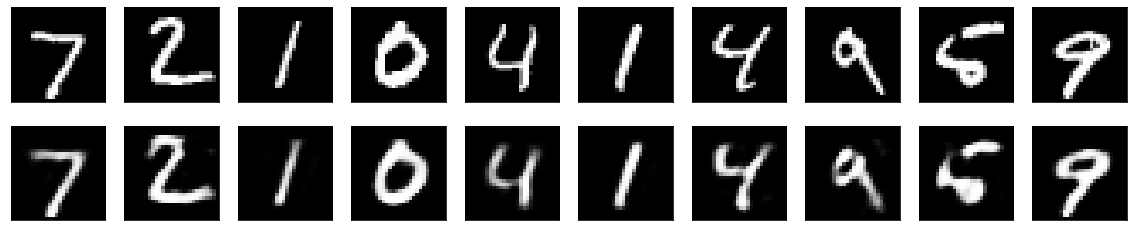

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalise values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# flatten images into vector of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

encoding_dim = 32 

input_img = keras.Input(shape=(784,)) # input image
encoded = layers.Dense(encoding_dim, activation='relu')(input_img) # encoded representation of input
decoded = layers.Dense(784, activation='sigmoid')(encoded) # decoded representation of input

autoencoder = keras.Model(input_img, decoded) # mapping input to reconstruction

encoder = keras.Model(input_img, encoded) # encoder model
encoded_input = keras.Input(shape=(encoding_dim,)) # encoded input
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input)) # decoder model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose = 0,
                validation_data=(x_test, x_test))

# encode-decode digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise 2 - Generative Adversarial Networks (GANs)**

**1. What are the specific properties of GANs in comparison to VAEs?**

- The images of the VAE are blurry and no realistic objects can be recognized. The GAN generates images with sharper edges. The GAN produces much sharper images than the VAE.
- he faces produced by the VAE own a more natural appearance.<br>
- The main difference between VAEs and GANs is their learning process. VAEs are minimizing a loss reproducing a certain image, and can, therefore, be considered as solving a semisupervised learning problem. GANs, on the other hand, are solving an unsupervised learning problem.
- The most important difference found is the training time for the two methods. GANs took longer time to train. Therefore the use of GANs is considered and proved a lot more stable. With GANs this does not necessarily occur. For low-diversity datasets like MNIST, both methods give sufficiently realistic images.
- Finally, using VAEs one can achieve results in less time, but with decreased image quality compared to results of GANs.

**2. Familiarize yourself with the following type of GANS and briefly explain how each technique differs from vanilla GANs and give an application example for each type.**

**a. Deep Convolutional GANs (DCGANs)**

The deep convolutional generative adversarial network, or DCGAN for short, is an extension of the GAN architecture for using deep convolutional neural networks for both the generator and discriminator models and configurations for the models and training that result in the stable training of a generator model.

The DCGAN is important because it suggested the constraints on the model required to effectively develop high-quality generator models in practice. This architecture, in turn, provided the basis for the rapid development of a large number of GAN extensions and applications.

Application Example:

Generate Cartoon Characters: training and use of a DCGAN for generating faces of anime characters

**b. Wasserstein GANs (WGANs)**

The Wasserstein generative adversarial network, or WGAN for short, is an extension to the GAN that changes the training procedure to update the discriminator model, now called a critic, many more times than the generator model for each iteration.

The critic is updated to output a real-value (linear activation) instead of a binary prediction with a sigmoid activation, and the critic and generator models are both trained using “Wasserstein loss,” which is the average of the product of real and predicted values from the critic, designed to provide linear gradients that are useful for updating the model.

In addition, the weights of the critic model are clipped to keep them small, e.g. a bounding box of $[-0.01. 0.01]$.

In order to have parameters $w$ lie in a compact space, something simple we can do is clamp the weights to a fixed box (say $W = [−0.01, 0.01]$ ) after each gradient update.

The benefit of the WGAN is that the training process is more stable and less sensitive to model architecture and choice of hyperparameter configurations. Perhaps most importantly, the loss of the discriminator appears to relate to the quality of images created by the generator.

Application Example:

Distinguish hand-written digits

**c. Self-Attention GANs (SAGANs)**

A Self-attention GAN is a DCGAN that utilizes self-attention layers. The idea of self-attention has been out there for years, also known as non-local in some researches. 
Convolution works by convolving nearby pixels and extracting features out of local blocks. They work “locally” in each layer. In contrast, self-attention layers learn from distant blocks.

Application Example:

To refine the image quality of the eye region (the red dot on the left figure), SAGAN only uses the feature map region on the highlight area in the middle figure. This region has a larger receptive field and the context is more focus and more relevant.

**d. BigGANs**

The big generative adversarial network, or BigGAN for short, is an approach that demonstrates how high-quality output images can be created by scaling up existing class-conditional GAN models.

The model architecture is based on a collection of best practices across a wide range of GAN models and extensions. Further improvements are achieved through systematic experimentation.

A “truncation trick” is used where points are sampled from a truncated Gaussian latent space at generation time that is different from the untruncated distribution at training time.

Application Example:

Generate Realistic Photographs: generation of synthetic photographs with technique BigGAN that are practically indistinguishable from real photographs.

**Exercise 3 - LSTMs & Transformers (7 points)**

**1. General architecture of LSTM unit**

- Each LSTM unit transfers two states namely cell state and hidden state to the next unit. The unit is responsible for taking input and storing it for some it and it does so using 3 mechanisms called gates.

- **Forget Gate:**  ($f_t$) It controls the extent to which a value remains in the unit. It takes two inputs This gate takes in two inputs -  $h_t-1$ and $x_t$.The given inputs are multiplied by the weight matrices and a bias is added. Following this, the sigmoid function is applied to this value. The sigmoid function outputs a vector, with values ranging from 0 to 1, corresponding to each number in the cell state.

- **Input Gate:**($i_t$) It controls the extent to which a new value flows into the unit. It adds information to the cell states using 3 steps:
  - Regulating what values need to be added to the cell state by involving a sigmoid function. 
  - Using tanh function and creating a vector containing all possible values that can be added (as perceived from h_t-1 and x_t) to the cell state.
  - Multiplying the value of the regulatory filter (the sigmoid gate) to the created vector (the tanh function) and then adding this useful information to the cell state via addition operation

- **Output Gate:**($o_t$) It controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit. It creates a vector after applying tanh function to the cell state. It then makes  a filter using sigmoid function using the values of h_t-1 and x_t, such that it can regulate the values that need to be output from the vector created above. Following this it multiplies the value of this regulatory filter to the vector created in step 1, and sending it out as a output and also to the hidden state of the next cell.



**2. What is a Bidirectional LSTM? And what are its advantages over a classical LSTM?**

Classical LSTMs only read information from the past i.e in forward direction. Bidirectional LSTMs train two LSTMs on the input sequence. The first LSTM takes the input in a forward direction and the other in the backward direction. They increase the amount of information available to the network due to two-passes and hence provide greater context to the algorithm as compared to classical LSTMs. This results in faster and ever-fuller learning on the problem.

**3. Both transformers and LSTMs retain memory of the generated output .What are the differences between transformers and LSTMs, and what are the advantages of transformers compared to LSTMs?**

Transformers make use of the attention mechanism, which involves assigning greater importance(weight) to certain parts of the input sequence. They are used to handle sequential data like LSTMS, however they do not process the input data in order. The attention mechanism provides context for any position in the input sequence. This allows for parallelisation and reduces training times making it possible to train on larger datasets which was not possible with LSTM.They are also useful for time series forecasting